In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# import the data
wine = pd.read_csv('winequality-red.csv', sep=';')
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [12]:
# transforme quality in 2 classes: 0 for bad and 1 for good
# if the quality is less or equal to 5, it is bad, otherwise it is good
wine['quality'] = [0 if x <= 5 else 1 for x in wine['quality']
                    ]
print(wine['quality'].value_counts()
        )  # print number of instances for each class

1    855
0    744
Name: quality, dtype: int64


### Logistic Regression Classifier without Regularization

Standardization

In [13]:
# let's scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scale the features
X = wine.drop('quality', axis=1)
X = scaler.fit_transform(X)
y = wine['quality']


In [14]:
# split test and train data
# 80:20 ratio
# random_state = 99

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=99)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


Classifier without regularization

In [15]:
# Logistic regression model for wine quality prediction
# import logistic regression model
from sklearn.linear_model import LogisticRegression
# fit the model
clf_no_reg = LogisticRegression(penalty='none')
clf_no_reg.fit(X_train, y_train)
# predict the response values for the observations in X
y_pred_test = clf_no_reg.predict(X_test)
y_pred_train = clf_no_reg.predict(X_train)
# import the metrics class
from sklearn import metrics
# generate evaluation metrics
print(f'Training Score {round(metrics.f1_score(y_train, y_pred_train),2)}')
print(f'Testing Score {round(metrics.f1_score(y_test, y_pred_test),2)}')


Training Score 0.77
Testing Score 0.73


A metric known as f1 score, which is the weighted mean of precision and recall, captures the performance of a classifier holistically. It takes values between 0 and 1 and the closer it is to 1, the better the classifier.

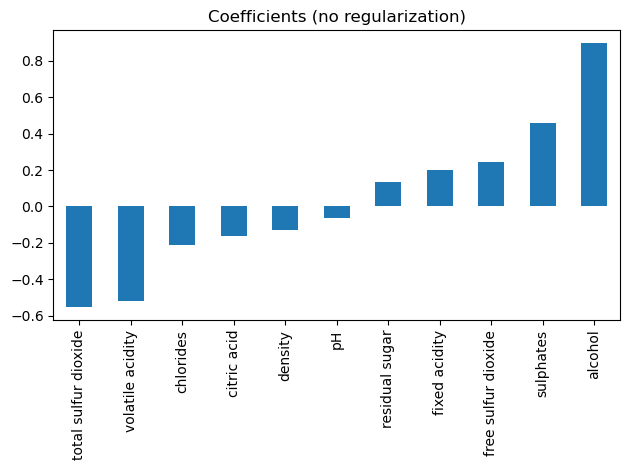

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot the coefficients obtained from fitting the Logistic Regression model.
predictors = wine.columns[:-1]
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

### Logistic Regression with L2 (ridge) Regularization

In [17]:
# the default implementation of logistic regression in scikit-learn is ridge-regularized

clf_deafult = LogisticRegression()
clf_deafult.fit(X, y)


LogisticRegression()

In [19]:
y_pred_test = clf_deafult.predict(X_test)
y_pred_train = clf_deafult.predict(X_train)

# generate evaluation metrics
print(f'Ridge-regularized Training Score {round(metrics.f1_score(y_train, y_pred_train),2)}')
print(f'Ridge-regularized Testing Score {round(metrics.f1_score(y_test, y_pred_test),2)}')

Ridge-regularized Training Score 0.77
Ridge-regularized Testing Score 0.72


The score remains practically the same

How we can tune up the regularization?
Recall that C is the inverse of the regularization strength (alpha), meaning that smaller values of C correspond to more regularization. 
The scikit-learn default for C is 1; therefore, in order to increase the amount of regularization, we need to consider values of C that are less than 1.

In [21]:
# test different C values
training_array = []
test_array = []

C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for C in C_array:
    clf = LogisticRegression(C=C)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    training_array.append(metrics.f1_score(y_train, y_pred_train))
    test_array.append(metrics.f1_score(y_test, y_pred_test))



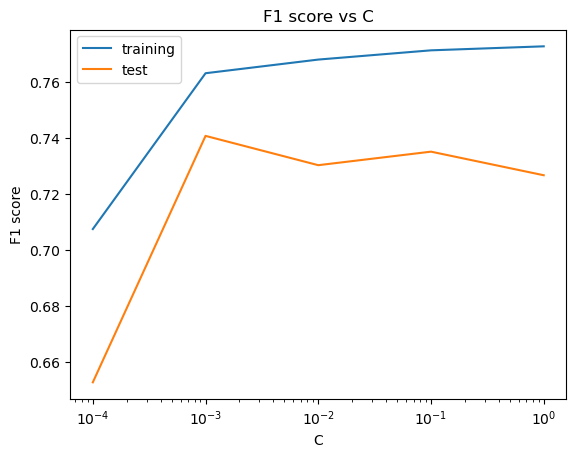

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the training and test scores as a function of C
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1 score')
plt.title('F1 score vs C')
plt.legend(['training','test'])
plt.show()
plt.clf()

The optimal C seems to be somewhere around 0.001 so a search window between 0.0001 and 0.01 is not a bad idea here!

### Hyperparameter Tuning for L2 Regularization

In [23]:

C_array = np.logspace(-4, -2, 100)
tunning_C = {'C': C_array}

In [24]:
# define a grid search model for a logistic regression
# ridge regularization
# scoring metric: f1
# 5 iterations


# import GridSearchCV
from sklearn.model_selection import GridSearchCV


clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, 
                  param_grid = tunning_C, 
                  scoring='f1', 
                  cv=5)
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)




{'C': 0.0019630406500402726}
0.7723336222647887


Define a new classifier clf_best_ridge that corresponds to the best C value you obtained in the previous task. Fit it to the training data and obtain the f1_score on the test data to validate the model.

In [27]:
clf_best_ridge = LogisticRegression(C=gs.best_params_['C']).fit(X_train, y_train)
y_pred_test = clf_best_ridge.predict(X_test)
print(f'F1 score: {round(metrics.f1_score(y_test, y_pred_test),2)}')

F1 score: 0.74


### Feature Selection using L1 Regularization

In [39]:
# Apply a cross-validation method
from sklearn.linear_model import LogisticRegressionCV
# Create a logistic regression model with cross-validation
Cs_array = np.logspace(-2, 2, 100)
clf_l1 = LogisticRegressionCV(cv=5,
                              Cs=Cs_array,
                              penalty='l1',
                              scoring='f1',
                              solver='liblinear')
# Fit the model
clf_l1.fit(X, y)
# Print the optimal C parameter
print('Optimal C: %.2f' % clf_l1.C_[0])
print('Coefficients:\n', clf_l1.coef_)

Optimal C: 0.26
Coefficients:
 [[ 0.1165647  -0.55642652 -0.17272449  0.03123861 -0.17325325  0.20048946
  -0.50580153  0.         -0.07037835  0.43220439  0.94101228]]


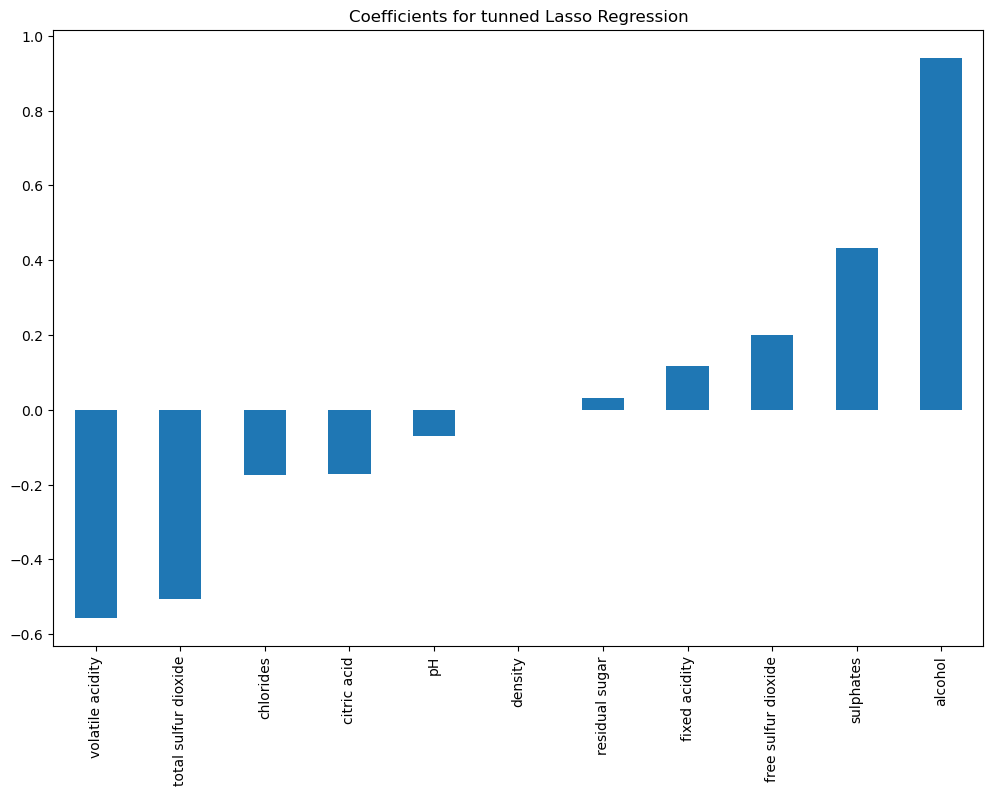

<Figure size 640x480 with 0 Axes>

In [40]:
# plot the sorted values of the coefficients as a bar plot
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients, predictors).sort_values()
plt.figure(figsize=(12, 8))
coef.plot(kind='bar', title='Coefficients for tunned Lasso Regression')
plt.show()
plt.clf()


Lasso regularization set the coefficient of one feature to zero, or elimited it (desity).